In [183]:
import pandas as pd
import os
pwd = os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import json
import requests
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import urllib.parse
nltk.data.path.append('/Users/alexandergebreamlak/nltk_data')


In [2]:

# As a data scientist, your task is to analyze the factors driving the spread of COVID-19 using publicly available data. 
# You are also required to support communication strategies with local stakeholders across Toronto, Calgary, and Vancouver 
# to address disinformation and misinformation about Mpox.

#Q1
df = pd.read_csv(pwd + "/owid-covid-data.csv")
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:

#Q2 
columns_of_interest = [
    'location',  
    'continent', 
    'total_cases',
    'total_deaths',
    'reproduction_rate', 
    'new_vaccinations',  
    'population_density',
    'median_age',
    'aged_65_older',  
    'gdp_per_capita', 
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',  
    'female_smokers',  
    'male_smokers',  
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',  
    'human_development_index',  
    'population'
]
cleaned_df = df[columns_of_interest]
cleaned_df

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [4]:
#Q3 Handle Missing Values
print(cleaned_df.isnull().sum())
df_no_missingness = cleaned_df.dropna(axis=0)
df_no_missingness


location                           0
continent                      26525
total_cases                    17631
total_deaths                   17631
reproduction_rate             244618
new_vaccinations              358464
population_density             68943
median_age                     94772
aged_65_older                 106165
gdp_per_capita                101143
extreme_poverty               217439
cardiovasc_death_rate         100570
diabetes_prevalence            83524
female_smokers                182270
male_smokers                  185618
handwashing_facilities        267694
hospital_beds_per_thousand    138746
life_expectancy                39136
human_development_index       110308
population                         0
dtype: int64


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
5413,Algeria,Africa,105369.0,2861.0,0.98,30.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5709,Algeria,Africa,208839.0,6017.0,1.17,23526.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5717,Algeria,Africa,209980.0,6052.0,1.14,147230.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
30534,Bangladesh,Asia,531799.0,8023.0,0.78,26.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
30535,Bangladesh,Asia,531799.0,8023.0,0.78,541.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428755,Zimbabwe,Africa,257340.0,5599.0,1.21,3446.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428756,Zimbabwe,Africa,257340.0,5599.0,1.15,2632.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428757,Zimbabwe,Africa,257340.0,5599.0,1.13,11526.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428762,Zimbabwe,Africa,257517.0,5602.0,1.06,2276.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [5]:
df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())
df_mean_inputation

/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/3436298396.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539


In [6]:
df_interpolate = cleaned_df.interpolate()
df_interpolate
#Preferable choice

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [7]:
#Q4 Plot a Covariance Matrix
df_interpolate.cov()


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/3529908052.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_interpolate.cov()


,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
total_cases,2.000285e+15,1.854088e+13,1.931933e+06,1.146724e+13,-1.747129e+09,9.321000e+06,7.551296e+06,4.593699e+09,-2.585984e+07,-3.309008e+08,-5.537645e+06,-2.178452e+07,-3.797852e+07,-7.507309e+06,-3.347550e+05,1.399639e+07,7.832508e+04,1.986404e+16
total_deaths,1.854088e+13,1.917811e+11,2.483887e+04,1.847347e+11,-1.926127e+07,1.142321e+05,8.279056e+04,6.024097e+07,-3.065980e+05,-3.383958e+06,-6.642620e+04,-2.070418e+05,-4.066423e+05,-1.687085e+05,8.924187e+03,1.112250e+05,1.142341e+03,2.140355e+14
reproduction_rate,1.931933e+06,2.483887e+04,2.943332e-01,3.006334e+04,-1.044940e+01,1.179835e+00,7.710072e-01,2.176061e+03,-1.698646e+00,-8.999776e+00,-4.927789e-02,7.728728e-01,5.071786e-01,7.665061e-01,1.509761e-01,8.028317e-01,2.170283e-02,5.358270e+07
new_vaccinations,1.146724e+13,1.847347e+11,3.006334e+04,1.758419e+12,-2.229852e+07,4.938377e+05,2.911916e+05,6.858824e+08,-6.823624e+05,-2.421654e+06,-4.683558e+04,-3.382543e+05,-1.870230e+05,3.562502e+05,1.616764e+04,1.495564e+05,5.524661e+03,4.444709e+14
population_density,-1.747129e+09,-1.926127e+07,-1.044940e+01,-2.229852e+07,2.685314e+06,1.529063e+03,3.712384e+02,5.907837e+06,6.479053e+02,1.960570e+03,-1.548527e+02,-2.786721e+02,8.362140e+02,2.688539e+03,7.773269e+02,2.354765e+03,1.702316e+01,-2.842043e+10
median_age,9.321000e+06,1.142321e+05,1.179835e+00,4.938377e+05,1.529063e+03,7.675548e+01,4.499346e+01,1.008252e+05,-7.482062e+01,-2.792694e+02,3.164306e+00,3.843361e+01,1.872278e+01,6.682525e+01,9.814028e+00,4.576466e+01,1.049990e+00,5.617786e+08
aged_65_older,7.551296e+06,8.279056e+04,7.710072e-01,2.911916e+05,3.712384e+02,4.499346e+01,3.367607e+01,5.725219e+04,-4.061948e+01,-2.008344e+02,-2.447974e+00,3.233575e+01,7.923447e+00,2.329890e+01,6.625197e+00,2.619720e+01,6.298563e-01,3.828518e+08
gdp_per_capita,4.593699e+09,6.024097e+07,2.176061e+03,6.858824e+08,5.907837e+06,1.008252e+05,5.725219e+04,3.902406e+08,-1.060271e+05,-9.684612e+05,7.159581e+03,4.885980e+04,-1.904209e+04,4.906835e+04,9.851400e+03,8.497464e+04,1.961139e+03,1.502881e+12
extreme_poverty,-2.585984e+07,-3.065980e+05,-1.698646e+00,-6.823624e+05,6.479053e+02,-7.482062e+01,-4.061948e+01,-1.060271e+05,3.285897e+02,1.682145e+02,-1.702733e+01,-3.288862e+01,-2.844084e+01,-1.881727e+02,-9.944832e+00,-5.767316e+01,-1.381507e+00,-8.843388e+08
cardiovasc_death_rate,-3.309008e+08,-3.383958e+06,-8.999776e+00,-2.421654e+06,1.960570e+03,-2.792694e+02,-2.008344e+02,-9.684612e+05,1.682145e+02,1.302084e+04,6.133557e+01,-1.117445e+02,4.432067e+02,-2.095312e+02,6.928704e+00,-3.285693e+02,-6.634575e+00,-3.984024e+09


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/811020990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_interpolate.corr()


                            total_cases  total_deaths  reproduction_rate  \
total_cases                    1.000000      0.946633           0.079613   
total_deaths                   0.946633      1.000000           0.104537   
reproduction_rate              0.079613      0.104537           1.000000   
new_vaccinations               0.193242      0.317933           0.041773   
population_density            -0.023839     -0.026840          -0.011753   
median_age                     0.023788      0.029774           0.248245   
aged_65_older                  0.029095      0.032577           0.244896   
gdp_per_capita                 0.005199      0.006963           0.203038   
extreme_poverty               -0.031775     -0.038482          -0.172122   
cardiovasc_death_rate         -0.064838     -0.067718          -0.145484   
diabetes_prevalence           -0.025667     -0.031444          -0.018828   
female_smokers                -0.049816     -0.048362           0.145748   
male_smokers

<AxesSubplot: >

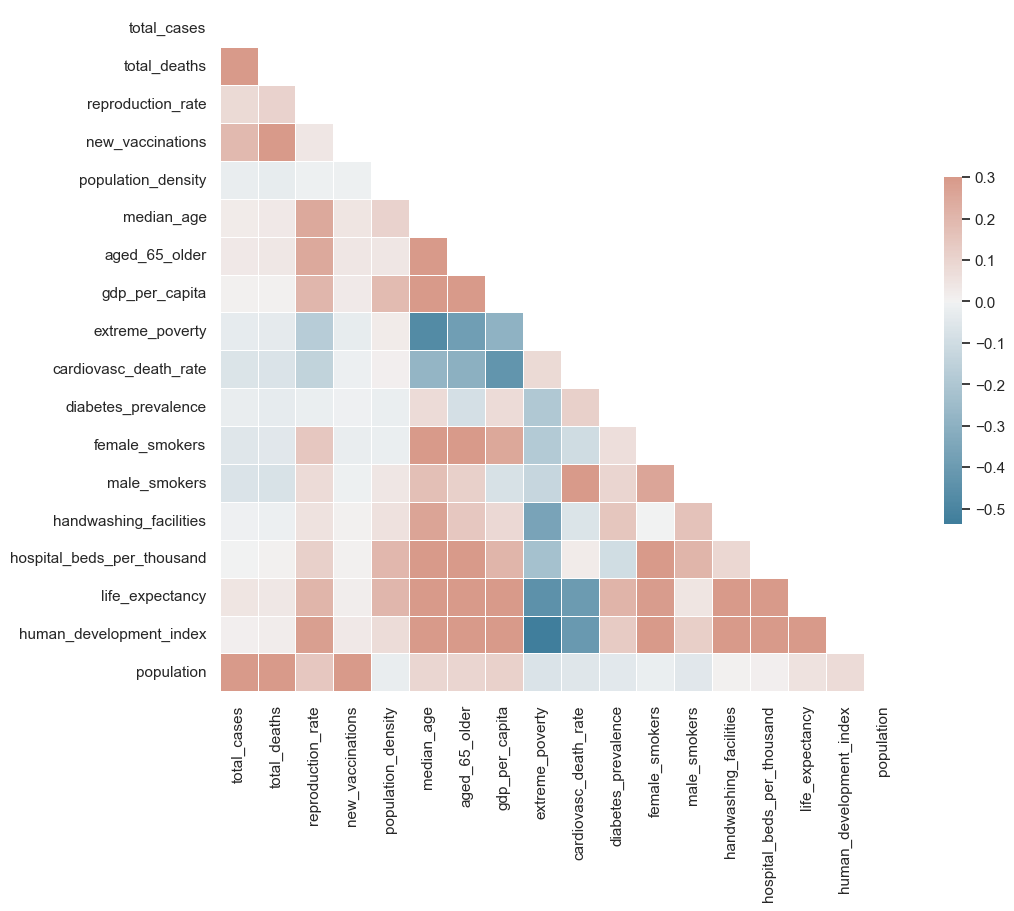

In [8]:
#Plotting a Correlation Matrix
corr = df_interpolate.corr()
print(corr)

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [202]:
#Project 2: Analyzing Public Concerns About Mpox
#Q1 Data Collection and Analysis

# Define your search terms
search_terms = 'Mpox OR Monkeypox OR M-pox'
subreddits = 'Toronto'
# subreddits = 'Vancouver'
# subreddits = 'Calgary'


# URL encode the parameters
encoded_search_terms = urllib.parse.quote(search_terms)
encoded_subreddits = urllib.parse.quote(subreddits)

# Construct the URL
url = f'https://api.pullpush.io/reddit/search/submission/?q={encoded_search_terms}&subreddit={encoded_subreddits}&after=1723617600&before=1727330400'
JSONContent = requests.get(url).json()
JSONContent

# Initialize an Empty DataFrame
data = pd.DataFrame()

# Check for 'data' Key and Create DataFrame from 'data' Key
if 'data' in list(JSONContent.keys()):
    data = pd.DataFrame.from_records(JSONContent['data'])

pd.set_option('display.max_columns', None)
data.head(100)

#Results
#Could not identify submissions/posts in the Calgary or Vancouver subreddit during this timeframe, whereas Toronto had 3 posts. Therefore, I decided to remove the time filter.


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,subreddit_type,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,mod_note,distinguished,subreddit_id,author_is_blocked,mod_reason_by,num_reports,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,toronto,,t2_sv4hizw9,False,None,0,False,TPH is urging eligible residents to get the mpox shot. But some can't find an appointment | CBC News,[],r/toronto,False,6,linkflair-flair-news,0,78.0,None,True,t3_1ew82rp,False,light,1.0,None,1,0,{},140.0,None,False,[],None,False,False,None,{},News,False,1,None,False,False,https://b.thumbs.redditmedia.com/9lNsSxlQR_eMseXoegkDqT-r6xkk9wBjEgSrneQBXNQ.jpg,False,None,[],{},link,None,False,public,1.724089e+09,text,6,automod_filtered,None,text,cbc.ca,False,None,None,None,None,https://www.cbc.ca/news/canada/toronto/mpox-2slgbtq-community-toronto-stigma-1.7295923?__vfz=medium%3Dsharebar,None,False,True,False,False,False,"{'images': [{'source': {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?auto=webp&amp;s=d7cf27de4906bb38c2c06736cf9ffa3e97a5fc29', 'width': 620, 'height': 349}, 'resolutions': [{'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=d2e621afed0c485212174ddcb60cc66c3155781c', 'width': 108, 'height': 60}, {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=216&amp;crop=smart&amp;auto=webp&amp;s=c789f9e5323aacc1380f4bfe289b47a18ccf7b8f', 'width': 216, 'height': 121}, {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=320&amp;crop=smart&amp;auto=webp&amp;s=825efaa9d65e6da5082f3ac30eb0bf75a8cd6d1b', 'width': 320, 'height': 180}], 'variants': {}, 'id': 'TH_CWZSeXtU-q9-2GAs_seHmSP6XpXy_tU6glpm-QYE'}], 'enabled': False}",[],[],False,c4304dcc-9cc0-11e7-bdc8-0efff6c24092,False,False,False,None,[],False,None,None,None,t5_2qi63,False,None,None,None,#67aee5,1ew82rp,False,None,Brief_Ad573,None,0,True,all_ads,False,[],False,None,/r/toronto/comments/1ew82rp/tph_is_urging_eligible_residents_to_get_the_mpox/,all_ads,False,https://www.cbc.ca/news/canada/toronto/mpox-2slgbtq-community-toronto-stigma-1.7295923?__vfz=medium%3Dsharebar,782885,1.724089e+09,0,None,False
1,None,toronto,[removed],t2_sv4hizw9,False,None,0,False,Toronto increases mpox vaccine slots amid concerns over access--CBC,[],r/toronto,False,6,linkflair-flair-news,0,NaN,None,True,t3_1ew6i1z,False,light,1.0,None,1,0,{},NaN,None,False,[],None,False,False,None,{},News,False,1,None,False,False,self,False,None,[],{},self,None,True,public,1.724086e+09,text,6,automod_filtered,None,text,self.toronto,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt;p&gt;[removed]&lt;/p&gt

In [203]:
#Creating fucntion to search reddit
def fetch_reddit_data(search_terms, subreddits):

    if isinstance(subreddits, list):
        subreddits = '+'.join(subreddits)

    # URL encode the parameters
    encoded_search_terms = urllib.parse.quote(search_terms)
    encoded_subreddits = urllib.parse.quote(subreddits)

    # Construct the URL
    url = f'https://api.pullpush.io/reddit/search/submission/?q={encoded_search_terms}&subreddit={encoded_subreddits}'

    # Fetch the JSON content
    JSONContent = requests.get(url).json()

    # Initialize an Empty DataFrame
    data = pd.DataFrame()

    # Check for 'data' key and create DataFrame from 'data' key
    if 'data' in JSONContent:
        data = pd.DataFrame.from_records(JSONContent['data'])

    return data

In [229]:
# Define your search terms and subreddit
search_terms = 'Mpox OR Monkeypox OR M-pox'
subreddit = 'Toronto'

# Fetch data
Toronto_data = fetch_reddit_data(search_terms, subreddit)

print(Toronto_data.shape)
Toronto_data.head()


(50, 115)


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,subreddit_type,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,mod_note,distinguished,subreddit_id,author_is_blocked,mod_reason_by,num_reports,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_created_utc,retrieved_on,retrieved_utc,crosspost_parent,crosspost_parent_list
0,NaN,toronto,,t2_sv4hizw9,False,NaN,0,False,TPH is urging eligible residents to get the mpox shot. But some can't find an appointment | CBC News,[],r/toronto,False,6,linkflair-flair-news,0.0,78.0,None,True,t3_1ew82rp,False,light,1.0,None,1.0,0,{},140.0,None,False,[],None,False,False,None,{},News,False,1,NaN,False,False,https://b.thumbs.redditmedia.com/9lNsSxlQR_eMseXoegkDqT-r6xkk9wBjEgSrneQBXNQ.jpg,False,None,[],{},link,None,False,public,1.724089e+09,text,6,automod_filtered,None,text,cbc.ca,False,None,NaN,None,NaN,https://www.cbc.ca/news/canada/toronto/mpox-2slgbtq-community-toronto-stigma-1.7295923?__vfz=medium%3Dsharebar,None,False,True,False,False,False,"{'images': [{'source': {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?auto=webp&amp;s=d7cf27de4906bb38c2c06736cf9ffa3e97a5fc29', 'width': 620, 'height': 349}, 'resolutions': [{'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=d2e621afed0c485212174ddcb60cc66c3155781c', 'width': 108, 'height': 60}, {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=216&amp;crop=smart&amp;auto=webp&amp;s=c789f9e5323aacc1380f4bfe289b47a18ccf7b8f', 'width': 216, 'height': 121}, {'url': 'https://external-preview.redd.it/1E6TPhe41Rh_XkO2VJweAKXJWEQVfsMeoQHmI5mItxk.jpg?width=320&amp;crop=smart&amp;auto=webp&amp;s=825efaa9d65e6da5082f3ac30eb0bf75a8cd6d1b', 'width': 320, 'height': 180}], 'variants': {}, 'id': 'TH_CWZSeXtU-q9-2GAs_seHmSP6XpXy_tU6glpm-QYE'}], 'enabled': False}",[],[],False,c4304dcc-9cc0-11e7-bdc8-0efff6c24092,False,False,False,None,[],False,None,NaN,None,t5_2qi63,False,NaN,NaN,NaN,#67aee5,1ew82rp,False,NaN,Brief_Ad573,None,0,True,all_ads,False,[],False,None,/r/toronto/comments/1ew82rp/tph_is_urging_eligible_residents_to_get_the_mpox/,all_ads,False,https://www.cbc.ca/news/canada/toronto/mpox-2slgbtq-community-toronto-stigma-1.7295923?__vfz=medium%3Dsharebar,782885,1.724089e+09,0,None,False,NaN,NaN,NaN,NaN,NaN
1,NaN,toronto,[removed],t2_sv4hizw9,False,NaN,0,False,Toronto increases mpox vaccine slots amid concerns over access--CBC,[],r/toronto,False,6,linkflair-flair-news,0.0,NaN,None,True,t3_1ew6i1z,False,light,1.0,None,1.0,0,{},NaN,None,False,[],None,False,False,None,{},News,False,1,NaN,False,False,self,False,None,[],{},self,None,True,public,1.724086e+09,text,6,automod_filtered,No

In [230]:
# Define your search terms and subreddit
search_terms = 'Mpox OR Monkeypox OR M-pox'
subreddit = 'Vancouver'

# Fetch data
Vancouver_data = fetch_reddit_data(search_terms, subreddit)

print(Vancouver_data.shape)
Vancouver_data.head()


(28, 115)


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,author_is_blocked,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_created_utc,retrieved_on,url_overridden_by_dest,crosspost_parent,crosspost_parent_list,retrieved_utc
0,NaN,vancouver,"Hey r/vancouver! \n\nContemplating if you should get a second dose of the vaccine to protect against mpox (formerly called monkeypox)? The answer is a big yes!\n\nVancouver Coastal Health is reminding people who are two-spirit, transgender, gay or bisexual, and other men who have sex with men, that getting both doses of the mpox (Imvamune) vaccine is the way to go for stronger and longer-lasting protection against infection.\n\nOne of the common signs of mpox is a rash. It usually sticks around for about 2 to 3 weeks and can show up on various parts of your body, such as the genitals, mouth, hands, feet, arms, or legs. The rash goes through different stages, starting as raised spots, then turning into fluid-filled blisters, and finally forming a scab that eventually falls off. [Here's a visual example of what mpox sores/blisters can look like over time.](https://www.instagram.com/p/CsMTm_7swY7/?igshid=MTIyMzRjYmRlZg==)\n\nIf you happen to experience any mpox symptoms, you can get assessed by your primary care provider, at Sexual Health clinics, at an Urgent and Primary Care Centre, or head straight to the Emergency Department. They'll help you figure out if you need any additional testing or not.\n\nSo if it's been at least 28 days since your first dose, it's time to lock in that appointment for your second dose. For those who haven't received their first dose, you can also book an appointment here: [https://www.vch.ca/en/service/mpox-vaccinations#wysiwyg--69416](https://www.vch.ca/en/service/mpox-vaccinations#wysiwyg--69416)",t2_3fq7hhe4,False,NaN,0,False,PSA: Time to get your second dose of mpox vaccine,"[{'e': 'text', 't': 'Local News'}]",r/vancouver,False,6,blue,0.0,NaN,None,False,t3_13rnwib,False,light,0.67,None,public,34.0,0,{},NaN,None,False,[],None,False,False,None,{},Local News,False,34,NaN,False,False,self,False,None,[],{},self,None,True,NaN,1.685036e+09,richtext,6,None,None,text,self.vancouver,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt;p&gt;Hey &lt;a href=""/r/vancouver""&gt;r/vancouver&lt;/a&gt;! &lt;/p&gt;\n\n&lt;p&gt;Contemplating if you should get a second dose of the vaccine to protect against mpox (formerly called monkeypox)? The answer is a big yes!&lt;/p&gt;\n\n&lt;p&gt;Vancouver Coastal Health is reminding people who are two-spirit, transgender, gay or bisexual, and other men who have sex with men, that getting both doses of the mpox (Imvamu

In [239]:
# Define your search terms and subreddit
search_terms = 'Mpox OR Monkeypox OR M-pox'
subreddit = 'Calgary'

# Fetch data
Calgary_data = fetch_reddit_data(search_terms, subreddit)

print(Calgary_data.shape)
Calgary_data.head()


(5, 94)


0    Calgary
1    Calgary
2    Calgary
3    Calgary
4    Calgary
Name: subreddit, dtype: object

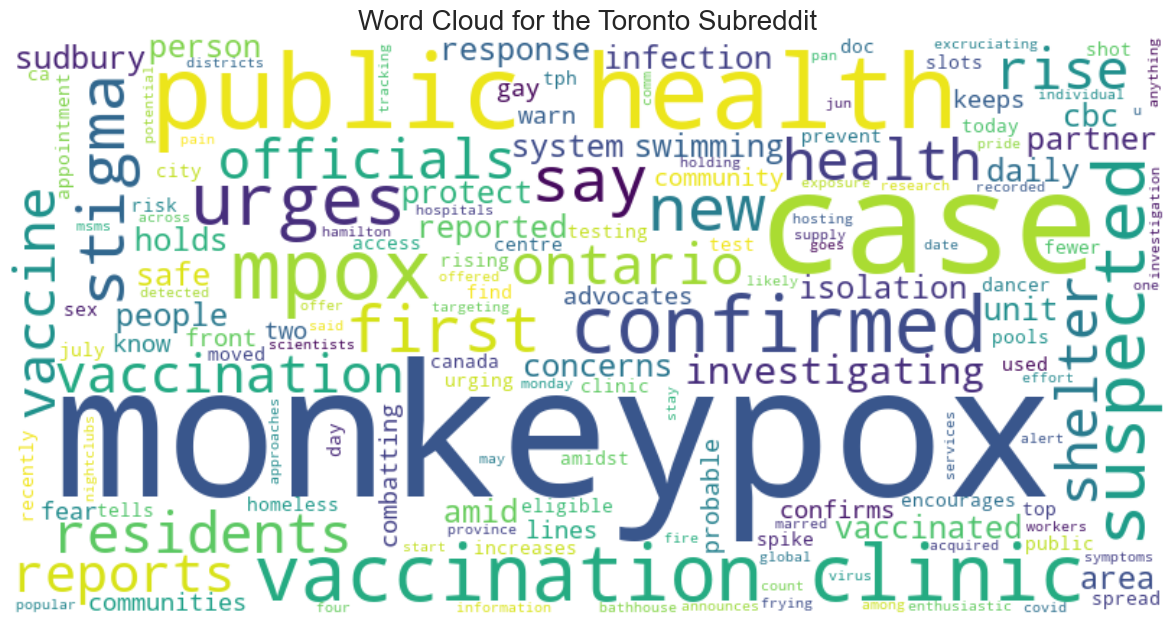

In [232]:
Toronto_data = Toronto_data[Toronto_data['subreddit'] == 'toronto']
Toronto_data['text'] = Toronto_data['title'].fillna('')

# # Download NLTK data files (if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')

# Combine all text into one large string
all_text = ' '.join(Toronto_data['text'])

# Convert text to lowercase
all_text = all_text.lower()

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Filter out the words
words_to_remove = ['toronto', 'https', 'author', 'comments', 'post', 'title']
tokens = [word for word in tokens if word not in words_to_remove]

processed_text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Toronto Subreddit', fontsize=20)
plt.show()

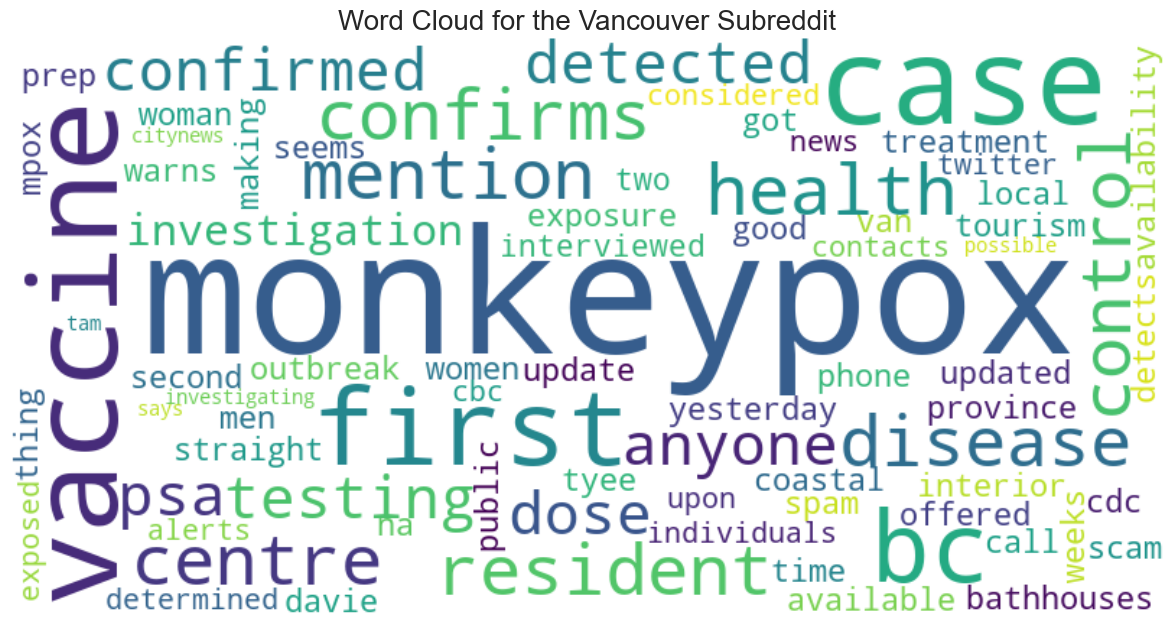

In [235]:
Vancouver_data = Vancouver_data[Vancouver_data['subreddit'] == 'vancouver']
Vancouver_data['text'] = Vancouver_data['title'].fillna('')

# # Download NLTK data files (if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')

# Combine all text into one large string
all_text = ' '.join(Vancouver_data['text'])

# Convert text to lowercase
all_text = all_text.lower()

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Filter out the words
words_to_remove = ['vancouver', 'https', 'author', 'comments', 'post', 'title']
tokens = [word for word in tokens if word not in words_to_remove]

processed_text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Vancouver Subreddit', fontsize=20)
plt.show()

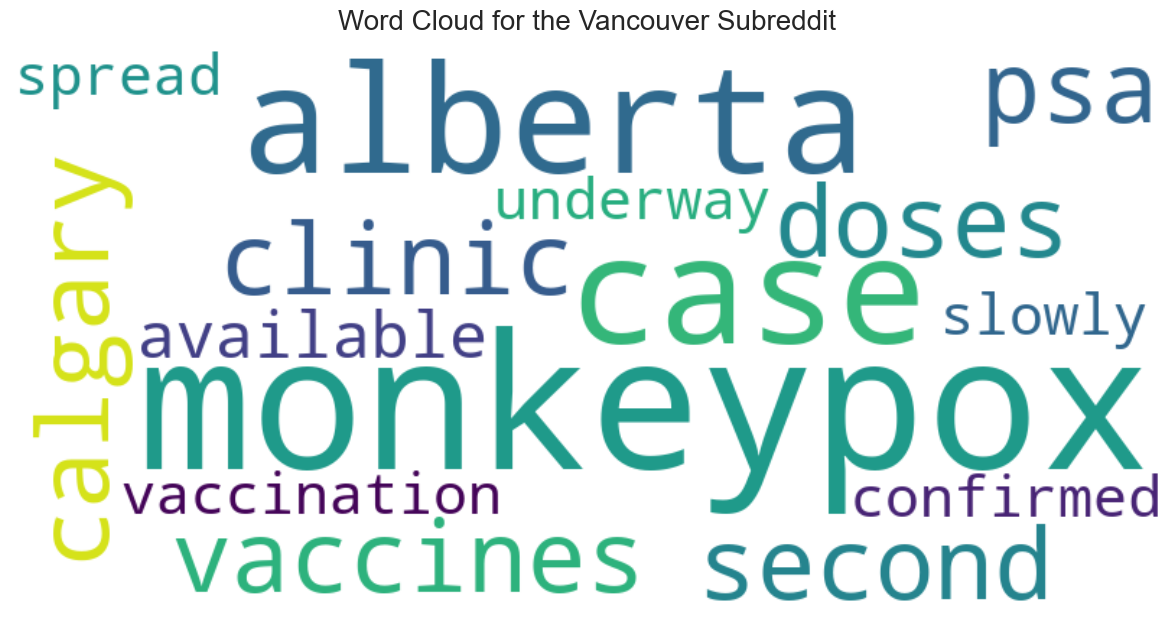

In [242]:
Calgary_data = Calgary_data[Calgary_data['subreddit'] == 'Calgary']
Calgary_data['text'] = Calgary_data['title'].fillna('')

# Combine all text into one large string
all_text = ' '.join(Calgary_data['text'])
all_text

# Convert text to lowercase
all_text = all_text.lower()

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Filter out the words
words_to_remove = ['toronto', 'https', 'author', 'comments', 'post', 'title']
tokens = [word for word in tokens if word not in words_to_remove]

processed_text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Calgary Subreddit', fontsize=20)
plt.show()

In [ ]:
#Comparison of Mpox public concerns across the three cities:

# Similarities include keywords like vaccination, confirmed and monkeypox
# As well as other public health realted term i.e. clinic, health, investigation, protect, etc.

# Differences include the term "stigma" which is only present in the Toronto Word Cloud (indicating social opinions on the virus)
# Vancouver also included "testing" and "centre", indicating they may have more efforts focused on tracking and managing the mpox outbreak.
# Calgary is very limited in terms of searches, therefore no additional terms are present that aren't already included in the other word clouds.


